# 2015 Scraped Foreclosure Case Data

In [1]:
from pandas import DataFrame, read_csv, to_datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
%matplotlib inline

In [2]:
df = read_csv("2015_clean.csv")

In [3]:
df["Filing Date"] = to_datetime(df["Filing Date"])

df.head()

,Filing Date,Case Number,Case Type,Title,Plaintiff,Defendant,Address,Zip Code,Partial Cost
0,1955-09-22,24O15002440,Mortgage,"John E Driscoll 111 vs Charles M Watkins, et al",John E Driscoll 111,"Charles M Watkins, et al",1225 Dellwood Avenue,21211.0,"$368,113.40"
1,2015-01-05,24O15000001,Mortgage,Edward S Cohn vs Estate Of Sharon Stenhouse,Edward S Cohn,Estate Of Sharon Stenhouse,3456 Dolfield Ave,21215.0,"$57,793.24"
2,2015-01-05,24O15000002,Mortgage,James E Clarke vs Christopher Frankos,James E Clarke,Christopher Frankos,3015 Grindon Ave,21214.0,"$279,975.59"
3,2015-01-05,24O15000003,Mortgage,"C.Larry Hofmeister Jr vs FTIC LLC, et al",C.Larry Hofmeister Jr,"FTIC LLC, et al",2819 Pelham Ave,21213.0,NaN
4,2015-01-05,24O15000004,Mortgage,Laura H.G O'sullivan vs Doreen Jenkins,Laura H.G O'sullivan,Doreen Jenkins,3300 Cliftmont Ave,21213.0,"$52,994.57"


In [4]:
print "Count of features:\n"
print df.count()

Count of features:

Filing Date     3405
Case Number     3405
Case Type       3405
Title           3405
Plaintiff       3394
Defendant       3394
Address         3405
Zip Code        3351
Partial Cost    3308
dtype: int64


In [5]:
print "NULL count:\n"
print df.isnull().sum()

NULL count:

Filing Date      0
Case Number      0
Case Type        0
Title            0
Plaintiff       11
Defendant       11
Address          0
Zip Code        54
Partial Cost    97
dtype: int64


In [6]:
new_df = DataFrame(df.groupby(df["Filing Date"].dt.week)['Case Number'].count())
new_df.columns = ["Case Count"]
new_df["Week"] = new_df.index

In [7]:
print "Distribution of cases:\n"
print new_df["Case Count"].describe()

Distribution of cases:

count    52.000000
mean     65.480769
std      14.055200
min      35.000000
25%      55.000000
50%      64.000000
75%      76.250000
max      97.000000
Name: Case Count, dtype: float64


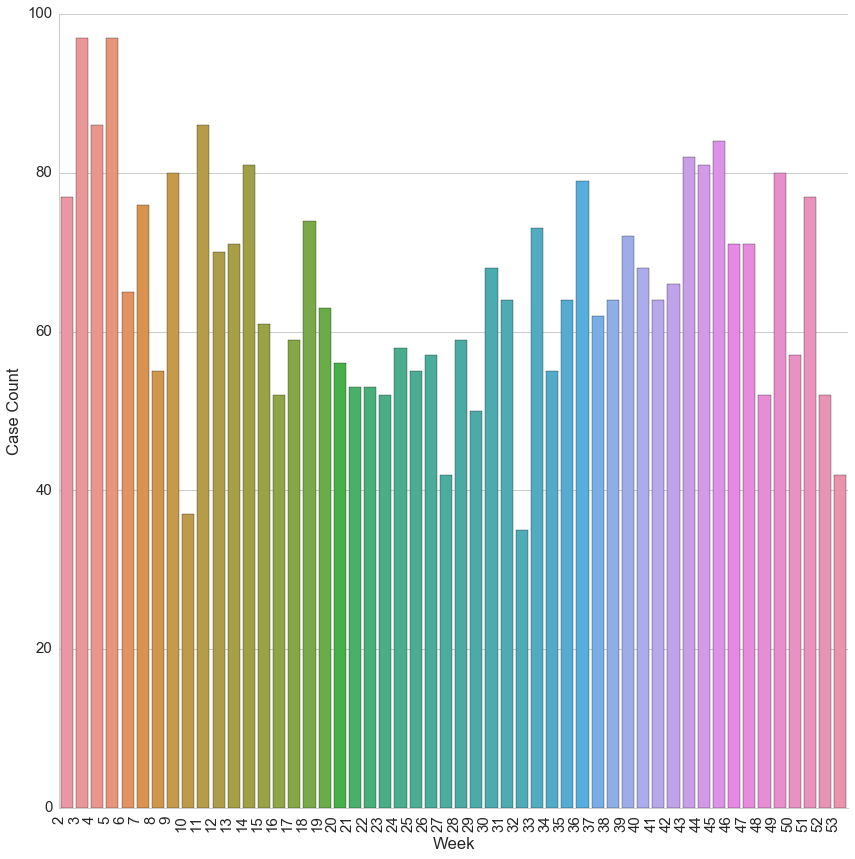

In [8]:
p = sns.factorplot(x="Week", y='Case Count', kind='bar', data=new_df, size=12)
p.set_xticklabels(rotation=90, horizontalalignment='right')